# Traditional Machine Learning Method

In this notebook, I am trying to build machine learning model using 43 features of exceptions to predict the log result, whether it fails (1) for success (0).

I will follow the steps below：

1. **Importing Packages and Fetching Data**  

2. **Exploratory Data Analysis (EDA)**

3. **Building Machine Learning Models**

4. **Conclusion**

5. **References**

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

/home/ec2-user/.env/lib64/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
import os
os.chdir('/home/ec2-user/UCD_MSBA_team/4Mengyu_Branch')

## Fetching data

In [54]:
exception_df = pd.read_csv('keyword_count_11740')

In [9]:
exception_df.head()

,Unnamed: 0,Listing Keywords Not Found,java.lang.InterruptedException,NoSuchObjectException,AddressNotFoundException,java.io.IOException,java.net.SocketException,org.apache.spark.SparkException,NoViableAltException,java.util.concurrent.ScheduledThreadPoolExecutor,...,org.apache.spark.sql.catalyst.errors.package$TreeNodeException,java.nio.channels.ClosedChannelException,ExitCodeException exitCode=1,pyspark.sql.utils.AnalysisException,java.net.ConnectException,java.net.UnknownHostException,java.lang.ArrayIndexOutOfBoundsException,java.lang.IllegalArgumentException,org.apache.spark.shuffle.MetadataFetchFailedException,result
0,0,0,68,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,110,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,3,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [10]:
exception_df.describe()

,Unnamed: 0,Listing Keywords Not Found,java.lang.InterruptedException,NoSuchObjectException,AddressNotFoundException,java.io.IOException,java.net.SocketException,org.apache.spark.SparkException,NoViableAltException,java.util.concurrent.ScheduledThreadPoolExecutor,...,org.apache.spark.sql.catalyst.errors.package$TreeNodeException,java.nio.channels.ClosedChannelException,ExitCodeException exitCode=1,pyspark.sql.utils.AnalysisException,java.net.ConnectException,java.net.UnknownHostException,java.lang.ArrayIndexOutOfBoundsException,java.lang.IllegalArgumentException,org.apache.spark.shuffle.MetadataFetchFailedException,result
count,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,...,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.0,11740.000000
mean,5869.500000,0.062606,159.412010,0.833220,1.000341,0.051363,0.022828,0.048893,0.000852,0.143271,...,0.003322,0.033816,0.014395,0.002470,0.002044,0.084242,0.064736,0.020187,0.0,0.609881
std,3389.190415,0.242264,1093.888421,0.789845,54.462161,0.526334,0.245911,0.712055,0.029174,5.166707,...,0.109545,1.002492,1.057128,0.049642,0.053779,6.476597,1.368254,0.501825,0.0,0.774918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.000000
25%,2934.750000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,5869.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,8804.250000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,11739.000000,1.000000,9999.000000,15.000000,3334.000000,20.000000,9.000000,39.000000,1.000000,330.000000,...,9.000000,58.000000,112.000000,1.000000,2.000000,541.000000,33.000000,36.000000,0.0,1.000000


In [79]:
exception_df.columns.values[22] = 'this_is_not_a_exception'

In [11]:
exception_df.isnull().sum()

Unnamed: 0                                                                                                             0
Listing Keywords Not Found                                                                                             0
java.lang.InterruptedException                                                                                         0
NoSuchObjectException                                                                                                  0
AddressNotFoundException                                                                                               0
java.io.IOException                                                                                                    0
java.net.SocketException                                                                                               0
org.apache.spark.SparkException                                                                                        0
NoViableAltException            

Good, since there is no null value.

## Exploratory Data Analysis (EDA)

### pairplot

In [12]:
## sns.pairplot(data = exception_df, hue ="Result")

### correlation heat map

In [13]:
corr = exception_df.corr()
corr

,Unnamed: 0,Listing Keywords Not Found,java.lang.InterruptedException,NoSuchObjectException,AddressNotFoundException,java.io.IOException,java.net.SocketException,org.apache.spark.SparkException,NoViableAltException,java.util.concurrent.ScheduledThreadPoolExecutor,...,org.apache.spark.sql.catalyst.errors.package$TreeNodeException,java.nio.channels.ClosedChannelException,ExitCodeException exitCode=1,pyspark.sql.utils.AnalysisException,java.net.ConnectException,java.net.UnknownHostException,java.lang.ArrayIndexOutOfBoundsException,java.lang.IllegalArgumentException,org.apache.spark.shuffle.MetadataFetchFailedException,result
Unnamed: 0,1.000000,-0.231463,-0.117692,0.211447,-0.018039,0.017469,-0.032392,0.002526,0.026775,-0.012604,...,0.004578,0.015424,-0.013234,0.016172,-0.029526,-0.018054,0.072373,0.009860,NaN,0.362972
Listing Keywords Not Found,-0.231463,1.000000,-0.037663,-0.272637,-0.004747,-0.025221,-0.023991,-0.017746,-0.007546,-0.007167,...,-0.007837,-0.008718,-0.003519,-0.012860,-0.009824,-0.003362,-0.012228,-0.010397,NaN,-0.536914
java.lang.InterruptedException,-0.117692,-0.037663,1.000000,-0.152479,0.111064,-0.005906,0.361303,-0.004092,-0.004026,0.006335,...,-0.004349,-0.003402,-0.001756,-0.007197,0.005897,0.081318,-0.006516,0.001967,NaN,-0.300491
NoSuchObjectException,0.211447,-0.272637,-0.152479,1.000000,-0.019319,0.010362,-0.052324,-0.013672,0.287123,-0.025748,...,0.006404,0.011965,0.002876,0.019198,-0.040104,-0.013723,0.013696,-0.000532,NaN,0.448730
AddressNotFoundException,-0.018039,-0.004747,0.111064,-0.019319,1.000000,-0.001793,-0.001705,-0.001169,-0.000536,-0.000509,...,-0.000557,-0.000620,-0.000250,-0.000914,-0.000698,0.597700,-0.000869,-0.000739,NaN,-0.038101
java.io.IOException,0.017469,-0.025221,-0.005906,0.010362,-0.001793,1.000000,0.014634,0.292649,-0.002849,0.180922,...,-0.002960,0.654276,0.156672,-0.004856,0.116671,-0.001269,-0.004617,0.150883,NaN,-0.037126
java.net.SocketException,-0.032392,-0.023991,0.361303,-0.052324,-0.001705,0.014634,1.000000,-0.006375,-0.002711,0.005069,...,-0.002815,0.002397,-0.001264,-0.004620,-0.003529,-0.001208,-0.004392,-0.003735,NaN,-0.104358
org.apache.spark.SparkException,0.002526,-0.017746,-0.004092,-0.013672,-0.001169,0.292649,-0.006375,1.000000,-0.002005,0.835328,...,-0.002082,0.182894,0.043880,-0.003417,0.010737,-0.000893,0.069410,0.051354,NaN,-0.047098
NoViableAltException,0.026775,-0.007546,-0.004026,0.287123,-0.000536,-0.002849,-0.002711,-0.002005,1.000000,-0.000810,...,-0.000885,-0.000985,-0.000398,0.057367,-0.001110,-0.000380,-0.001381,-0.001175,NaN,-0.022980
java.util.concurrent.ScheduledThreadPoolExecutor,-0.012604,-0.007167,0.006335,-0.025748,-0.000509,0.180922,0.005069,0.835328,-0.000810,1.000000,...,-0.000841,0.042812,-0.000378,-0.001380,-0.001054,-0.000361,-0.001312,-0.001116,NaN,-0.050932


In [81]:
#plt.subplots(figsize=(30,30))
#sns.heatmap(corr, annot=True, cmap="YlGn")

## Building Machine Learning Models

### PCA 

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

In [55]:
my_df = exception_df

In [56]:
my_df.columns

Index(['Unnamed: 0', 'Listing Keywords Not Found',
       'java.lang.InterruptedException', 'NoSuchObjectException',
       'AddressNotFoundException', 'java.io.IOException',
       'java.net.SocketException', 'org.apache.spark.SparkException',
       'NoViableAltException',
       'java.util.concurrent.ScheduledThreadPoolExecutor',
       'java.net.BindException', 'Ignore File not found exceptions: true',
       'MetadataFetchFailedException', 'JSONException',
       'java.net.SocketTimeoutException', 'FetchFailedException',
       'FileNotFoundException',
       'org.apache.thrift.transport.TTransportException',
       'java.lang.IllegalStateException',
       'org.apache.spark.rpc.RpcTimeoutException',
       'java.util.concurrent.TimeoutException',
       'org.apache.spark.rpc.RpcTimeout.org$apache$spark$rpc$RpcTimeout$$createRpcTimeoutException',
       'org.apache.spark.util.Utils$.logUncaughtExceptions',
       'java.net.SocketException.1',
       'org.apache.hadoop.yarn.excepti

In [57]:
###Why change the column name to Result?
my_df['Result'] = my_df['result']

In [58]:
drop_elements = ['Result','result']
y = my_df["Result"]
X = my_df.drop(drop_elements, axis=1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Text(0.5,0,'3rd eigenvector')

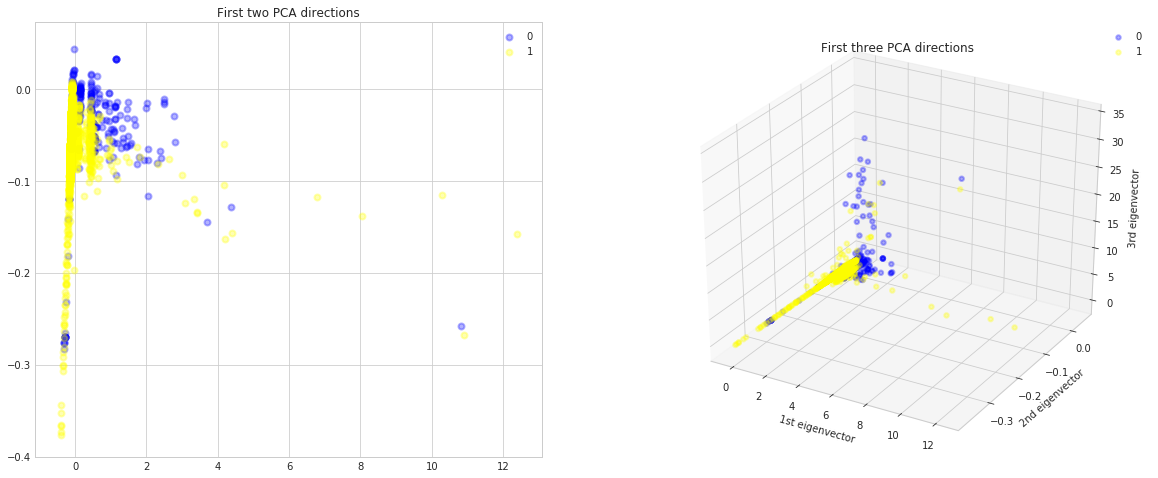

In [61]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(my_df.drop('Result', axis=1))
X = std_scale.transform(my_df.drop('Result', axis=1))
y = my_df['Result']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes

In [62]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.14587154, 0.2439957 , 0.30852173, 0.35871066, 0.40379652,
       0.44781591, 0.48828786, 0.52678576, 0.55899921, 0.5878264 ,
       0.61562315, 0.64202291, 0.66804925, 0.69396048, 0.71971196,
       0.74538102, 0.77103279, 0.79664257, 0.822109  , 0.84704791,
       0.87057508, 0.89085905, 0.90981275, 0.92628348, 0.94142696,
       0.95550468, 0.96925136, 0.97952002, 0.98826589, 0.99396924,
       0.99843729, 0.99959629, 0.99986219, 0.9999603 , 0.99999015,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

If Autodesk aims to achieve 95% accuracy, we can keep 25 of the variables and drop almost half of the variables.

### Gaussian Naive Bayes

In [63]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)


The accuracy of Gaussian Naive Bayes is 0.9501703577512777


### Linear Support Vector Machine

In [64]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.811328790459966


### Radical Support Vector Machine

In [65]:
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.811328790459966


### Logistic Regression

In [66]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.9603918228279387


### Random Forest Classifier

In [73]:
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.9846678023850085


### K-Nearest Neighbors

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.8760647359454855


### Cross Validation

In [69]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest']
models=[GaussianNB(), svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

,CV Mean,Std
Naive Bayes,0.999148,0.000852
Linear Svm,1.000000,0.000000
Radial Svm,0.993867,0.006128
Logistic Regression,0.993697,0.004176
Decision Tree,1.000000,0.000000
KNN,0.992334,0.005195
Random Forest,0.999744,0.000545


Seems that Decison tree gives us the best accuracy score with lowest standard error. For now, we can go with this model. 

### Confusion Matrix

In [74]:
#firstly, let's get the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = randomforest.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 418    1    4]
 [   2   48   13]
 [  10    6 1846]]


In [86]:
set(y_pred)

{-1, 0, 1}

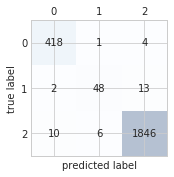

In [75]:
#show the matrix in picture
#here, 0 means unknown, 1 means failure and 2 means success
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
#Then let's take a look at precision, recall and F1 scores.
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
#They are very close.